In [16]:
import pandas as pd
import numpy as np
archivo = 'csv_creados/Arg_MonetaryAgregates.csv'
df = pd.read_csv(archivo)

#### GDP

GDP : Gross Domestic Product

#### Añadimos a nuestro Data Frame el GDP en términos nominales

In [17]:
archivo = 'Data_in/GDP_F.xlsx'
gdp = pd.read_excel(archivo)

In [18]:
gdp['Año'] = pd.to_datetime(gdp['Año'].astype(str) + '1231', format='%Y%m%d')
df['Año'] = pd.to_datetime(df['Año'])
df = pd.merge(df,gdp, on='Año', suffixes=('_df', '_gdp'))
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU)
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509
1,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807
2,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136
3,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471
4,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472


### CPI

CPI : Consumer price index

#### Añadimos a nuestro Data Frame el CPI en número indice con año base 2016

In [19]:
import os
import pandas as pd

# Verificar el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())

# Verificar si el archivo existe en la ruta especificada
file_path = 'Data_in/cpi_argentina2.xls'
if not os.path.isfile(file_path):
    print(f"El archivo no se encuentra en la ruta: {file_path}")
else:
    # Leer el archivo si se encuentra en la ruta especificada
    df = pd.read_excel(file_path)
    print(df.head())


Directorio de trabajo actual: /Users/gonzalocaro/Desktop/Proyecto BCRA/Git Repository/Argentina_Inflation
El archivo no se encuentra en la ruta: Data_in/cpi_argentina2.xls


In [20]:
import os

os.chdir('/Users/gonzalocaro/Desktop/Proyecto BCRA/Git Repository/Argentina_Inflation')

archivo = 'Data_in/cpi_argentina2.xlsx'
cpi = pd.read_excel(archivo)



In [21]:
###archivo = 'Data_in/cpi_argentina2.xls'
### cpi = pd.read_excel(archivo)
df = pd.merge(df,cpi, on='Año', suffixes=('_df_inflation', '_cpi'))


In [22]:
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016)
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,6.172503e-12
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136,7.426182e-12
2,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471,9.570257e-12
3,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472,1.201940e-11
4,1964-12-31,Pesos,0.029565,0.044402,0.057836,0.063475,0.481860,1.547793e-11


Añadimos a nuestro Data Frame el GDP en términos reales

In [23]:
df_excel = pd.read_excel('Data_in/GDP_Real_Argentina.xls')
df_excel['Año'] = pd.to_datetime(df_excel['Año'])
df = df.merge(df_excel, on='Año', how='left')

In [24]:
df.head(1)

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU)
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.02783,0.166807,6.172503e-12,182932009390


In [25]:
df.to_csv('csv_creados/df_Inflation.csv', index=False)

#### Calculamos la Velocidad del Dinero de M2

Ecuation of Exchange --> M * V = P * Q (PQ = nominal GDP)

V = GDP / M

In [26]:
df['Velocity of M2'] = df['GDP (current LCU)'] / df['M2']

In [27]:
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU),Velocity of M2
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,6.172503e-12,182932009390,6.382836
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136,7.426182e-12,192861271430,7.273797
2,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471,9.570257e-12,191218051890,8.364576
3,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472,1.201940e-11,181067821330,9.051316
4,1964-12-31,Pesos,0.029565,0.044402,0.057836,0.063475,0.481860,1.547793e-11,199410530600,8.331514


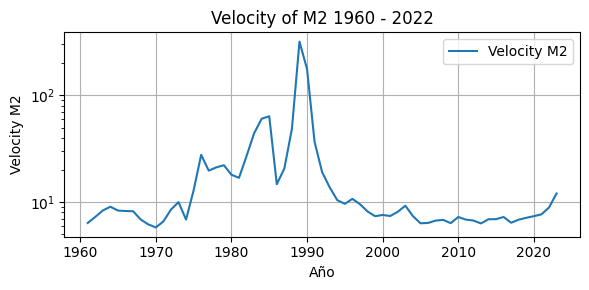

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 3))
plt.title('Velocity of M2 1960 - 2022')
plt.xlabel('Año')
plt.ylabel('Velocity M2')

plt.plot(df['Año'], df['Velocity of M2'], label='Velocity M2')

plt.yscale("log")  # Agrega la escala logarítmica al eje Y

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df.to_csv('csv_creados/df_infl.csv', index=False) #df_infl --> datos en términos absolutos

#### Cremos otro Data Frame con las variables en tasas de variación anual

m + v = p + q
 
siendo:

m = crecimiento de la oferta monetaria

v = crecimiento de la velocidad del dinero

p = inflación

q = crecimiento del GDP real

In [30]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [31]:
df_infl_tva = df_infl.copy()
for col in df_infl.columns[2:]:  # Excluye las columnas 'Año' y 'divisa'
    df_infl_tva[col] = df_infl[col].pct_change()

In [32]:
## Eliminamos la primera fila por no poder calcular su TVA
df_infl_tva = df_infl_tva.iloc[1:]
df_infl_tva.reset_index(drop=True, inplace=True)

In [33]:
df_infl_tva.columns = ['Año', 'Divisa', 'M0_gr', 'M1_gr', 'M2_gr', 'M3_gr', 'GDP_gr', 'Inflation Rate', 'GDP_Real_gr', 'Velocity M2_gr']

In [37]:
df_infl_tva.head()

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M2_gr
0,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.277738,0.203107,0.054278,0.139587
1,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.189245,0.288718,-0.008520,0.149960
2,1963-12-31,Pesos,0.374048,0.272704,0.310597,0.322993,0.418199,0.255912,-0.053082,0.082101
3,1964-12-31,Pesos,0.407422,0.436742,0.456275,0.447860,0.340466,0.287746,0.101303,-0.079525
4,1965-12-31,Pesos,0.392356,0.250926,0.259297,0.275853,0.247748,0.212329,0.105694,-0.009170


In [35]:
df_infl_tva.to_csv('csv_creados/df_infl_tva.csv',index=False) #df_infl --> datos en términos relativos